In [10]:
import pandas as pd
import sqlite3
import contextlib 
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import g3read as g
import pp
u = pp.pint()

DB="/tmp/antonio/magneticum.sql"

def simul(q):
    with contextlib.closing(sqlite3.connect(DB)) as con:
        with con as cur:
           return pd.read_sql_query(q, cur)
    

def supermap(df, f, p=0.005):
    n = len(df.index)
    fn = int(n*p)    
    largest  = f.nlargest(fn).tail(1).values[0]
    smallest  = f.nsmallest(fn).tail(1).values[0]
    return df.where(f<largest).where(f>smallest*1.1).where(f!=np.nan), df.where((f>largest)|(f<smallest*1.1)|(f==np.nan))

def plot_f(ax, xmin, xmax, f, bins=20,logscale=True):
    if logscale:
        xs = np.logspace(np.log10(xmin), np.log10(xmax), bins)
    else:
        xs = np.linspace(xmin, xmax, bins)
    vfunc = np.vectorize(f)
    ax.plot(xs,vfunc(xs))

u.define('hubble = %f'%(simul("select h from simulation").h[0]))

In [11]:
simul ("""
            select snap.id as snap_id,*
            from simulation
            inner join snap on snap.simulation_id=simulation.id
            inner join (
                select fof.snap_id as id,count(*) as count
                from fof
                where resolvness > 0
                group by fof.snap_id
            ) as A on A.id = snap.id
       """)


,snap_id,id,name,box_size,h,id,name,redshift,a,simulation_id,tag,id,count
0,1,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,1,037,2.220446e-16,1.000000,1,z0,1,26146
1,2,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,2,025,4.701941e-01,0.680182,1,z05,2,7206
2,3,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,3,014,1.178895e+00,0.458948,1,z1,3,222
3,4,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704,4,012,1.477581e+00,0.403619,1,z15,4,29
4,6,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,6,031,2.520891e-01,0.798665,2,z0,6,156110
5,7,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,7,026,4.701941e-01,0.680182,2,z05,7,146339
6,8,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,8,015,1.178895e+00,0.458948,2,z1,8,99669
7,9,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,9,012,1.706354e+00,0.369501,2,z15,9,63542
8,10,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704,10,011,1.980082e+00,0.335561,2,z2,10,48925
9,11,3,/HydroSims/Magneticum/Box4/uhr_test/,48000.0,0.704,11,136,6.634019e-02,0.937787,3,z0,11,1845


In [5]:
all_df = simul (" select * from fof  where resolvness = 1    ")
box0mr_bao_z0_df = simul (" select * from fof  where resolvness = 1  and snap_id=1   ")

box0mr_df = simul (" select * from fof  where resolvness = 1  and snap_id in (1,2,3,4,5)   ")


boxes_df = simul (" select * from fof  where resolvness = 1    ")





In [13]:
all_z0_df = simul (" select fof.* from fof inner join snap on snap.id=fof.snap_id where resolvness = 1 and snap.tag='z0'    ")
rdf = all_df.sample(n=20000)

<IPython.core.display.Javascript object>


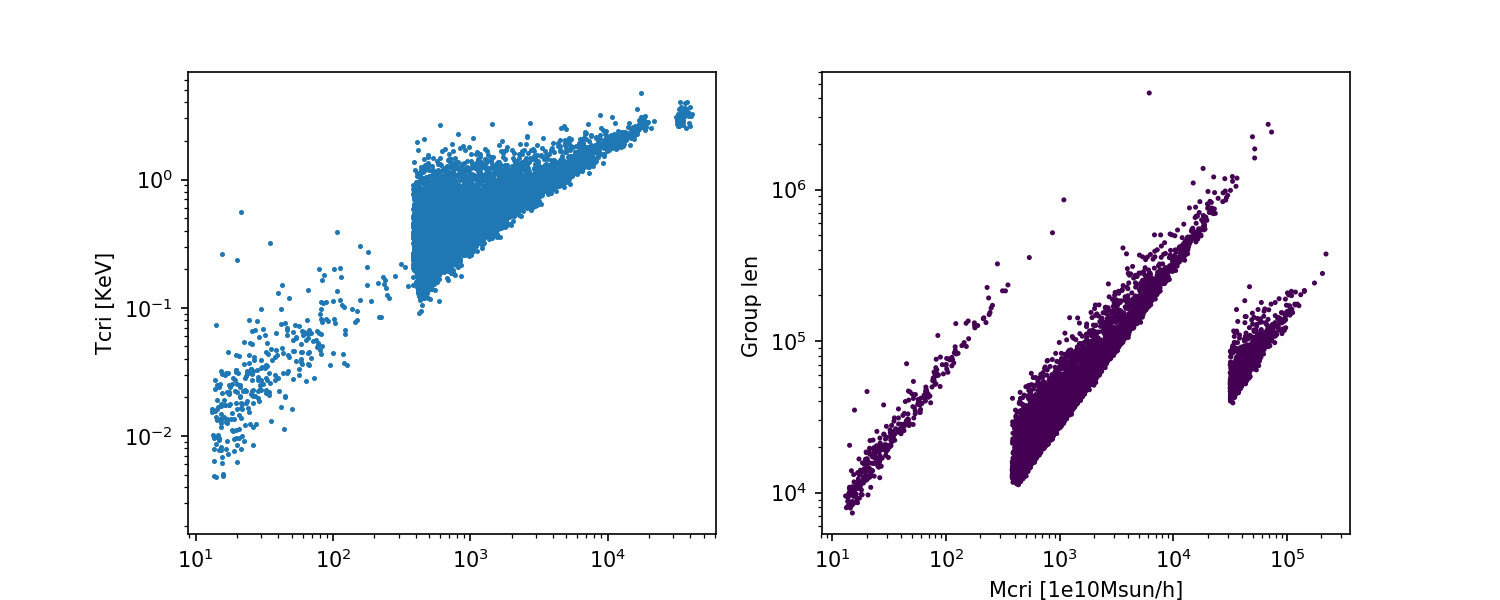

'4.024500e+04'

In [7]:
f,a12 = plt.subplots(1,2, figsize=(10,4))
a1=a12[0]
a2=a12[1]
f.subplots_adjust(hspace=0)
a1.scatter( rdf.mcri,rdf.tgas4,s=2) #c=rdf.redshift, s=2)
a1.set_xscale('log')
a1.set_yscale('log')
a1.set_ylabel("Tcri [KeV]")

a2.scatter( rdf.mcri,rdf.glen,c=rdf.resolvness, s=2) #c=rdf.redshift, s=2)
a2.set_xscale('log')
a2.set_yscale('log')
a2.set_xlabel("Mcri [1e10Msun/h]")

a2.set_ylabel("Group len ")
#fig.show()
"%e"%np.min(df.glen)

<IPython.core.display.Javascript object>


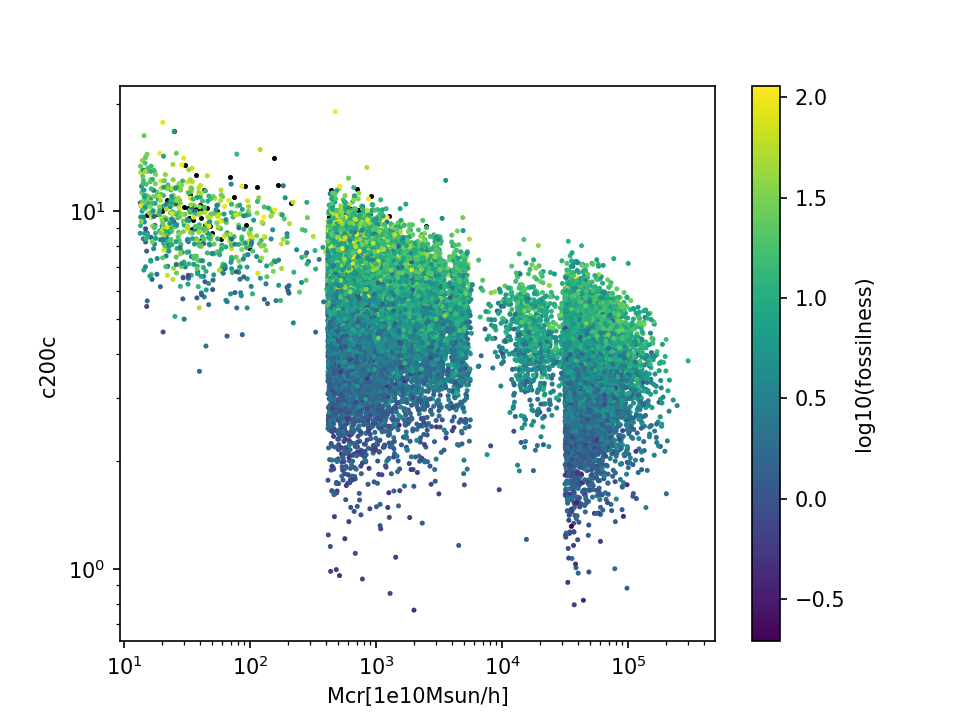

/home/moon/ragagnin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [17]:
fig,a = plt.subplots(1,1)
df=all_z0_df.sample(n=100000)
fdf, scartatidf =  supermap(df,df.fossilness)
scatter = a.scatter( scartatidf.mcri,scartatidf.c200c,  s=2, color="black") #c=rdf.redshift, s=2)
scatter = a.scatter( fdf.mcri,fdf.c200c, c=np.log10(fdf.fossilness), s=2) #c=rdf.redshift, s=2)
a.set_xscale('log')
a.set_yscale('log')
fig.colorbar(scatter, label="log10(fossilness)")
a.set_xlabel("Mcr[1e10Msun/h]")
a.set_ylabel("c200c ")
None

In [38]:
xdf = simul ("""
select fof.id_cluster,fof.mcri from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster and galaxy.snap_id = fof.snap_id
 where   galaxy.snap_id = 1 and fof.snap_id = 1 and
 fof.mcri>.7e15/1e10 and
  galaxy.msub>fof.mcri*0.1

""")




In [26]:
def counts(df, n):
    ids, counts = np.unique(df.id_cluster,return_counts =True)
    count = len(ids[counts>=n])
    print("FoF groups with %.2e < Mcri/h < %.2e and with %d massive galaxies: %d "%(np.min(df.mcri)*1e10, np.max(df.mcri)*1e10, n, count))

counts(xdf, 3)
counts(xdf, 4)
counts(xdf, 5)

FoF groups with 7.00e+14 < Mcri/h < 3.85e+15 and with 3 massive galaxies: 29 
FoF groups with 7.00e+14 < Mcri/h < 3.85e+15 and with 4 massive galaxies: 2 
FoF groups with 7.00e+14 < Mcri/h < 3.85e+15 and with 5 massive galaxies: 1 
